In [ ]:
!pip install deepface


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=9ca98994d0cb7ae0563787d05acacd356e88e7dd68ebb215216ee512127c155a
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
!pip install face_recognition


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=e91f43c93a817dfe40deceac067741dfb6b191a19682b65ea669f2a004d1d2cc
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from deepface import DeepFace


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from PIL import Image
!pip install face_recognition
import face_recognition
image = face_recognition.load_image_file("/content/gdrive/MyDrive/License.jpeg")
top, right, bottom, left = face_recognition.face_locations(image)[0]
face_image = image[top:bottom, left:right]
cropped_face = Image.fromarray(face_image)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


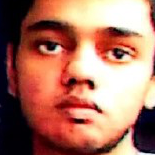

In [ ]:
cropped_face

In [ ]:
!pip3 install ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=7db7efb87f9c344b33913ae6d071eb3093bfbc828651bef246cafaa4419095f8
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
# ''''''
# Constant variables that need to be refer
# ''''''

# Extensions for images and videos
ALLOWED__PICTURE_EXTENSIONS = ('.png', '.jpg', '.jpeg', '.gif')
ALLOWED_VIDEO_EXTENSIONS = ('mp4', 'avi', 'webm', 'mov')

# Constant variable for directory
frames_folder = "./frames"
upload_folder = "./upload"

# Constant threshold for resizing
frame_size_threshold = 200000
image_size_threshold = 500000
max_resize = 40000

# key strings source type checking
source_type_image = "image"
source_type_video = "video"

In [ ]:
!pip install ffmpeg
!pip install face_recognition

import math
import os

import cv2
import ffmpeg
import h5py


import face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
import os

import cv2
import ffmpeg
import h5py


import face_recognition

def check_rotation(path_video_file):
    # Start checking orientation of video received
    print("Checking orientation of video received")

    # this returns meta-data of the video file in form of a dictionary
    meta_dict = ffmpeg.probe(path_video_file)

    # from the dictionary, meta_dict['streams'][0]['tags']['rotate'] is the key we are looking for
    rotate_code = None
    rotate_angle = 'NO_ROTATE'

    # try rotate the image by finding rotate key meta_dict
    # if no, prompt message and skip
    for stream in meta_dict['streams']:
        if 'rotate' in stream['tags']:
            if int(stream['tags']['rotate']) == 90:
                rotate_code = cv2.ROTATE_90_CLOCKWISE
                rotate_angle = 'ROTATE_90_CLOCKWISE'
            elif int(stream['tags']['rotate']) == 180:
                rotate_code = cv2.ROTATE_180
                rotate_angle = 'ROTATE_180'
            elif int(stream['tags']['rotate']) == 270:
                rotate_code = cv2.ROTATE_90_COUNTERCLOCKWISE
                rotate_angle = 'ROTATE_90_COUNTERCLOCKWISE'
            else:
                print("No rotation metadata. Skip check rotation")

    print("Rotated to = ", rotate_angle)
    return rotate_code


def correct_rotation(frame, rotate_code):
    return cv2.rotate(frame, rotate_code)


def extract_frames_from_video(video_path, request_frames_folder_path):
    count = 0

    # check if video requires rotation
    # rotate_code = check_rotation(video_path)

    cap = cv2.VideoCapture(video_path)
    frame_rate = cap.get(5)  # frame rate

    while cap.isOpened():
        frame_id = cap.get(1)  # current frame number
        ret, frame = cap.read()
        if ret:

            # check rotate_code
            # If got code, rotate the frame back to original orientation
            # if rotate_code is not None:
            #     frame = correct_rotation(frame, rotate_code)

            if frame_id % math.floor(frame_rate) == 0:
                print('Extract the new %d frame of video...' % count)
                cv2.imwrite(request_frames_folder_path + '/frame_%d.jpg' % count, frame)

                # check extracted frame size is large than
                frame_size = os.stat(request_frames_folder_path + '/frame_%d.jpg' % count).st_size

                if frame_size > frame_size_threshold:
                    print('Resizing the new %d frame of video...' % count)
                    frame = cv2.resize(frame, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
                    cv2.imwrite(request_frames_folder_path + '/frame_%d.jpg' % count, frame)

                count = count + 1
        else:
            break

    cap.release()
request_frames_folder_path="/content/gdrive/MyDrive/images"
extract_frames_from_video("/WIN_20221012_09_26_09_Pro (1).mp4", request_frames_folder_path)

for i, frame in enumerate(os.listdir(request_frames_folder_path)):
  if(str(frame)==".ipynb_checkpoints"):
    continue
  absolute_video_frame_directory_file = os.path.join(request_frames_folder_path, frame)
  print(absolute_video_frame_directory_file)
  unknown_image = face_recognition.load_image_file(absolute_video_frame_directory_file)
  unknown_face_encodings = face_recognition.face_encodings(unknown_image)
  if len(unknown_face_encodings) > 0:
      face_found_in_video = True
      print("There is at least one face in frame. Continue matching the face")
      break

/content/gdrive/MyDrive/images/frame_0.jpg
/content/gdrive/MyDrive/images/frame_1.jpg
/content/gdrive/MyDrive/images/frame_2.jpg
There is at least one face in frame. Continue matching the face


In [ ]:
# from skimage.io import imread
# !pip install cpbd
# !pip install scipy==1.1.0
# !pip install imageio
# # from src.cpbd import compute
# import cpbd
# from imageio import imread
from PIL import Image



def face_distance_to_conf(face_distance, face_match_threshold=0.5):
    if face_distance > face_match_threshold:
        range_distance = (1.0 - face_match_threshold)
        linear_val = (1.0 - face_distance) / (range_distance * 2.0)
        return linear_val
    else:
        range_distance = face_match_threshold
        linear_val = 1.0 - (face_distance / (range_distance * 2.0))
        return linear_val + ((1.0 - linear_val) * math.pow((linear_val - 0.5) * 2, 0.2))
# def calculate_sharpness(known_image_path, cropped_image_path):
#     known_image = imread(known_image_path, pilmode='L')
#     cropped_image = imread(cropped_image_path, pilmode='L')
#     return cpbd.compute(known_image) - cpbd.compute(cropped_image)
face_found_in_image = False
face_found_in_video = False
final_confidence = None
is_match = None
confidences_list = []
known_face_encoding = []
sharpness_similarity = None
known_path="/content/gdrive/MyDrive/License.jpeg"
video_path="/content/gdrive/MyDrive/IMG_5272_2_MOV_AdobeExpress.mp4"
request_upload_folder_path="/content/gdrive/MyDrive/ccnnotes"
request_frames_folder_path="/content/gdrive/MyDrive/images"
tolerance=0.50
face_match_threshold=0.70
sharpness_threshold=0.60

cropped_face_path = os.path.join(request_upload_folder_path, "cropped_face.jpg")

    # declare json key and default value pair

# Load the uploaded image file
known_image = face_recognition.load_image_file(known_path)
# face_encodings without [] is to get face encodings for any faces in the uploaded image
known_face_encodings = face_recognition.face_encodings(known_image)
if len(known_face_encodings) > 0:
        # since i know the image will always have 1 face, so only get the first face detected
        known_face_encoding = face_recognition.face_encodings(known_image)[0]
        face_found_in_image = True
        print("Found face in image")
        top, right, bottom, left = face_recognition.face_locations(known_image)[0]
        face_image = known_image[top:bottom, left:right]
        cropped_face = Image.fromarray(face_image)
        cropped_face.save(cropped_face_path, "JPEG")


for i, frame in enumerate(os.listdir(request_frames_folder_path)):
    if(str(frame)==".ipynb_checkpoints" or str(frame)=='.DS_Store'):
      continue
    print("Hi")
    print(frame)
    # face_recognition.load_image_file("/content/drive/MyDrive/shasvat2.jpg")
    absolute_video_frame_directory_file = os.path.join(request_frames_folder_path, frame)
    unknown_image = face_recognition.load_image_file(absolute_video_frame_directory_file)
    unknown_face_encodings = face_recognition.face_encodings(unknown_image)

    # if extracted unknown frames have face,
    if len(unknown_face_encodings) > 0:
        print("Matching the face in frame %d..." % i)
        unknown_face_encoding = face_recognition.face_encodings(unknown_image, num_jitters=1)[0]
        print(known_face_encoding)
        print()
        face_distances = face_recognition.face_distance([known_face_encoding], unknown_face_encoding)
        confidence = face_distance_to_conf(face_distances, tolerance)
        confidences_list.append(confidence[0])

        # See if the first face in the uploaded image matches the known face
        # provide tolerance level to specify how strict it is. By default is 0.5
        # Uncomment below for use the API
        # match_results = face_recognition.compare_faces([known_face_encoding], unknown_face_encoding,
        #                                                tolerance=tolerance)
        # print(match_results)
    else:
        print("Done")
        print("Did not found face in either image or video. Can't proceed to compare with image")


    #####
    # Part 4
    # Check whether face match confidence > threshold
    # and check whether sharpness > threshold
    # and return the result as Json
    #####
final_confidence = sum(confidences_list) / float(len(confidences_list))
print(final_confidence)

if final_confidence >= face_match_threshold:
    is_match = True
else:
    is_match = False

Found face in image
Hi
frame_0.jpg
Done
Did not found face in either image or video. Can't proceed to compare with image
Hi
frame_1.jpg
Done
Did not found face in either image or video. Can't proceed to compare with image
Hi
frame_2.jpg
Matching the face in frame 2...
[-0.12938154  0.04397871  0.12008181 -0.1116945  -0.04480134 -0.01133937
 -0.06303881 -0.08296648  0.1343292  -0.11679567  0.17539909  0.02214931
 -0.18669552 -0.09800345 -0.02907153  0.09101044 -0.08470522 -0.1744433
  0.04150622 -0.06455001  0.04269253  0.04895158 -0.04242545  0.06575406
 -0.15585041 -0.32681337 -0.11523079 -0.06075643 -0.05885307 -0.06793226
 -0.01753602  0.11334543 -0.19832687 -0.01332787 -0.04076429  0.13203214
 -0.05002024 -0.03148558  0.18131378  0.03252873 -0.11749629 -0.00298353
  0.01059557  0.33547136  0.12062614 -0.02287051  0.01261152 -0.01118436
  0.1045344  -0.25174338  0.01908216  0.1830498   0.04183596  0.09766393
  0.04255342 -0.06399718  0.08264238  0.08016318 -0.23357528  0.05872496
 -

In [ ]:
is_match

True